## DATA: School discipline data by race ethnicity and gender, 2019-2020

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%config InlineBackend.figure_format = 'retina'
pd.set_option("display.precision", 2)

In [270]:
df = pd.read_excel("School discipline data by race_ethnicity and gender, 2019-2020.xlsx")

In [271]:
df.columns = ["district_num", "district_name", "discipline_school_num", 
              "discipline_school_name", "discipline_code", "discipline_description",
              "white", "black_or_afr_american", "hispanic_latino", "asian", 
              "native_hawaiian_or_o_pac_isl", "a_indian_or_alaska_n", 
              "two_or_more_races", "female", "male", "total"]

In [272]:
df.replace(to_replace="*", value=np.NaN, inplace=True)

In [273]:
df.district_name = df.district_name.astype("str")
df.discipline_school_name = df.discipline_school_name.astype("str")
df.discipline_code = df.discipline_code.astype("str")
df.discipline_description = df.discipline_description.astype("str")

---

In [347]:
df.tail()

,district_num,district_name,discipline_school_num,discipline_school_name,discipline_code,discipline_description,white,black_or_afr_american,hispanic_latino,asian,native_hawaiian_or_o_pac_isl,a_indian_or_alaska_n,two_or_more_races,female,male,total
9541,74,FAMU LAB SCH,351,FLORIDA A&M UNIVERSITY DEVELOPMENTAL RESEARCH ...,I,Suspension In-School,0.0,28.0,0.0,0.0,0.0,1.0,0.0,11.0,18.0,29.0
9542,74,FAMU LAB SCH,351,FLORIDA A&M UNIVERSITY DEVELOPMENTAL RESEARCH ...,O,Suspension Out-of-School,0.0,44.0,0.0,0.0,0.0,0.0,0.0,21.0,23.0,44.0
9543,74,FAMU LAB SCH,351,FLORIDA A&M UNIVERSITY DEVELOPMENTAL RESEARCH ...,P,Placement in Alternative Educational Setting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9544,75,UF LAB SCH,391,P.K. YONGE DEVELOPMENTAL RESEARCH SCHOOL,I,Suspension In-School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9545,75,UF LAB SCH,391,P.K. YONGE DEVELOPMENTAL RESEARCH SCHOOL,O,Suspension Out-of-School,2.0,7.0,1.0,0.0,0.0,0.0,0.0,2.0,8.0,10.0


In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   district_num                  9546 non-null   int64  
 1   district_name                 9546 non-null   object 
 2   discipline_school_num         9546 non-null   int64  
 3   discipline_school_name        9546 non-null   object 
 4   discipline_code               9546 non-null   object 
 5   discipline_description        9546 non-null   object 
 6   white                         4360 non-null   float64
 7   black_or_afr_american         4360 non-null   float64
 8   hispanic_latino               4360 non-null   float64
 9   asian                         4360 non-null   float64
 10  native_hawaiian_or_o_pac_isl  4360 non-null   float64
 11  a_indian_or_alaska_n          4360 non-null   float64
 12  two_or_more_races             4360 non-null   float64
 13  fem

### Half of the data can not be explored. 4360 cases with non null values in gender and ethnicity. 
### But it may be enough to infere population parameters.

---

# BASIC EDA

In [275]:
df.total.sum()

289213.0

In [452]:
df.female.sum()

92077.0

In [430]:
df.female.sum() / df.total.sum()

0.3183708892753784

### Total number of disciplinary cases: 289,213

### Total number of female disciplinary cases: 92,077.  It's 32% of all cases.

---

## Districts

In [457]:
districts = df.groupby("district_name")["total"].sum().sort_values(ascending=False)
top10_dist_share = np.round(districts[:10].values.sum()/df.total.sum(), 4)*100
print("These 10 districts have in total {} cases. \
It's about {}% of all cases.".format(int(districts[:10].values.sum()), top10_dist_share))

These 10 districts have in total 157244 cases. It's about 54.37% of all cases.


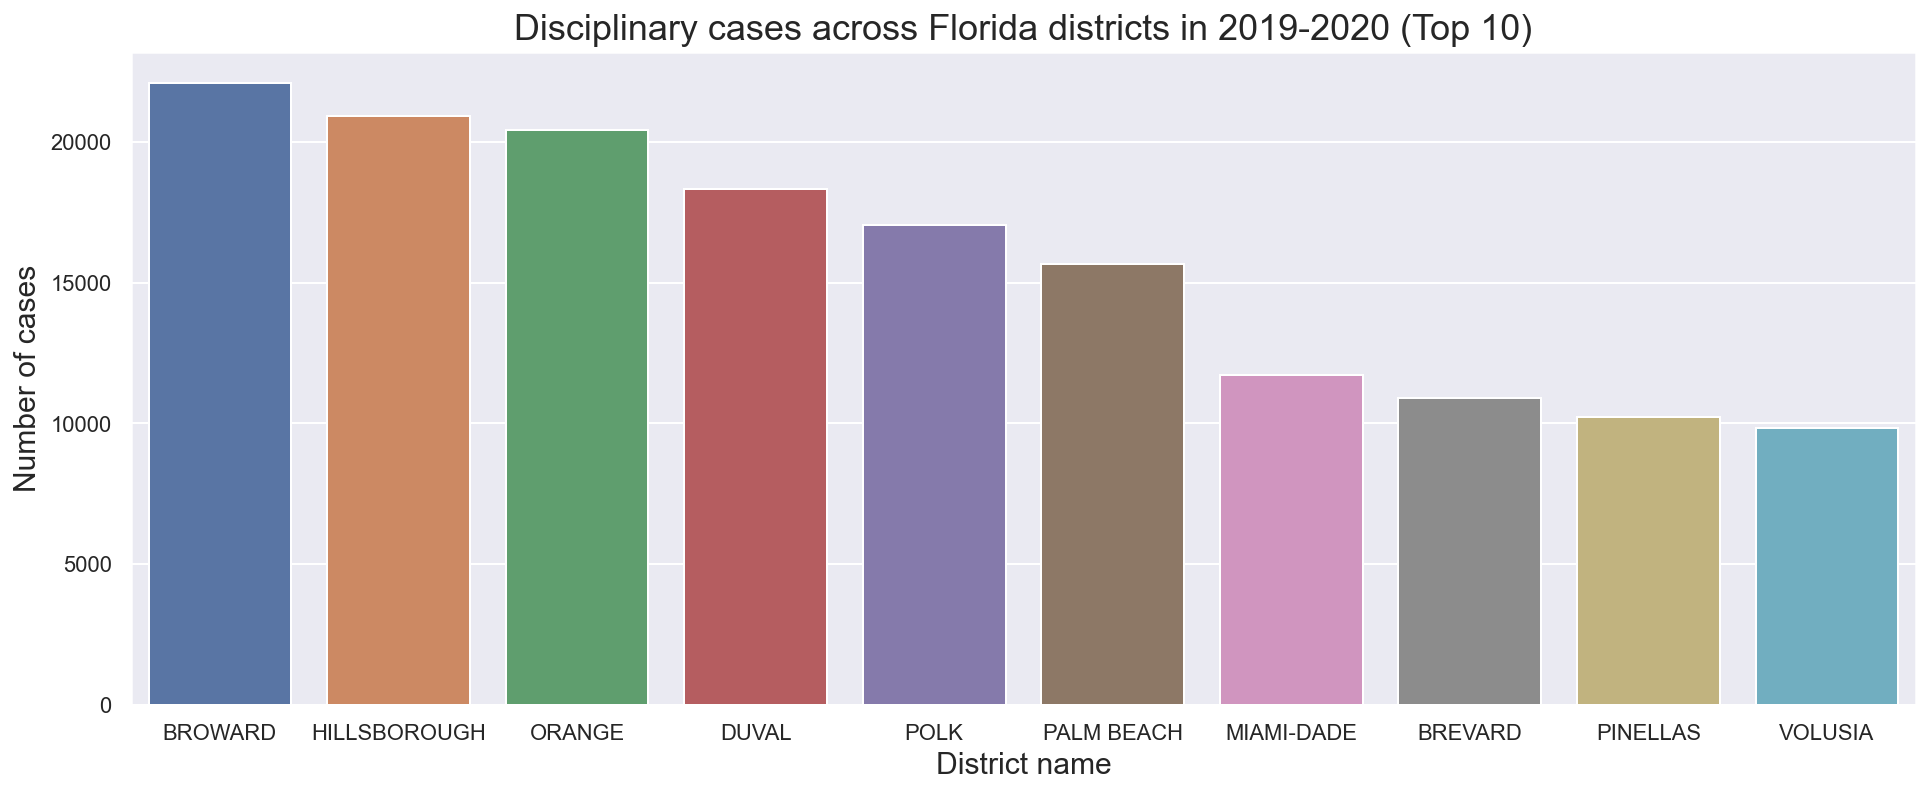

In [458]:
plt.figure(figsize=(16,6))
sns.barplot(x=districts[:10].index, y=np.round(districts[:10].values));
plt.xlabel("District name", fontsize=15)
plt.ylabel("Number of cases", fontsize=15)
plt.title("Disciplinary cases across Florida districts in 2019-2020 (Top 10)", fontsize=18);

### These 10 districts have in total 157,244 cases. It's about 54.37% of all cases in 2019-2020.

---

In [454]:
districts_female = df.groupby("district_name")["female"].sum().sort_values(ascending=False)
top10_dist_share_female = np.round(districts_female[:10].values.sum()/df.female.sum(), 4)*100
print("These 10 districts have in total {} cases. \
It's about {}% of all cases.".format(int(districts_female[:10].values.sum()), top10_dist_share_female))

These 10 districts have in total 52210 cases. It's about 56.699999999999996% of all cases.


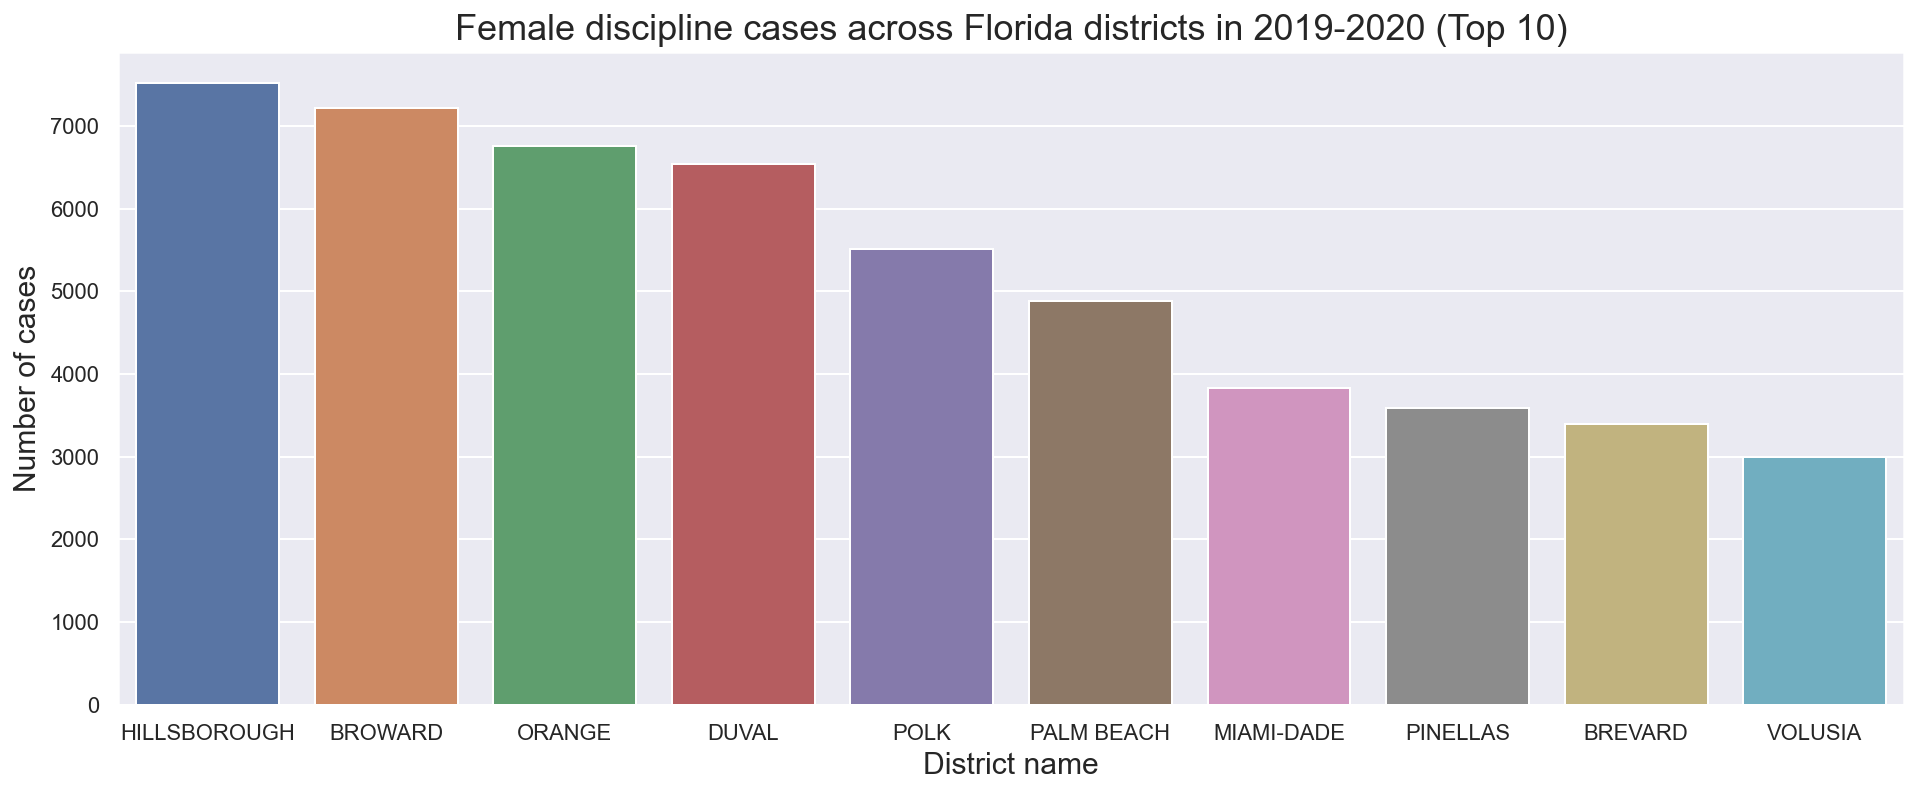

In [455]:
plt.figure(figsize=(16,6))
sns.barplot(x=districts_female[:10].index, y=np.round(districts_female[:10].values));
plt.xlabel("District name", fontsize=15)
plt.ylabel("Number of cases", fontsize=15)
plt.title("Female discipline cases across Florida districts in 2019-2020 (Top 10)", fontsize=18);

### These 10 districts have in total 52210 female cases. It's about 57% of all female cases, from all 72 districts.

## Schools

In [279]:
schools = df.groupby("discipline_school_name")["total"].sum().sort_values(ascending=False);
top20_schools_share = np.round(schools[:20].values.sum()/df.total.sum()*100, 2)
print("Case share of top 20 schools: {}%".format(top20_schools_share))
print("Number of schools observed in data:", df.discipline_school_name.unique().shape[0])

Case share of top 20 schools: 5.35%
Number of schools observed in data: 3241


In [396]:
schools[:20]

discipline_school_name
PALM BEACH LAKES HIGH SCHOOL                             1034.0
CRYSTAL LAKE MIDDLE SCHOOL                                942.0
MAYNARD EVANS HIGH                                        941.0
SEMINOLE HIGH SCHOOL                                      915.0
LENNARD HIGH SCHOOL                                       850.0
SHELLEY S. BOONE MIDDLE SCHOOL                            815.0
SOUTH BROWARD HIGH SCHOOL                                 802.0
COCOA HIGH SCHOOL                                         799.0
SOUTHEAST HIGH SCHOOL                                     774.0
LAKE SHORE MIDDLE SCHOOL                                  757.0
SOUTHWEST MIDDLE SCHOOL                                   755.0
RIVERVIEW HIGH SCHOOL                                     707.0
WESTWOOD MIDDLE SCHOOL                                    700.0
SLEEPY HILL MIDDLE SCHOOL                                 685.0
PARKWAY MIDDLE SCHOOL                                     684.0
FORT PIERCE WESTW

### Top 20 schools with most cases.

### These 20 schools contain 5% of all cases in Florida in 2019-2020. 

Note: If we check first school in the list - PALM BEACH LAKES HIGH SCHOOL in google. It had 2,634 students in 2019-2020.  
Maybe the statistic is wrong? Cause our data suggests that 1,034 out of 2,634 students had disciplinary cases.

Link: https://www.greatschools.org/florida/west-palm-beach/2301-Palm-Beach-Lakes-High-School/  

This link provides the grades and overall score of students at PALM BEACH LAKES HIGH SCHOOL.  
The academic performance is much below the average.  
Intuitively we can that low average score in school correlates with high number disciplinary cases.

In [459]:
counts_by_school = df.groupby("discipline_school_name")[["white", 
                                                         "black_or_afr_american", 
                                                         "hispanic_latino", 
                                                         "asian", 
                                                         "native_hawaiian_or_o_pac_isl",
                                                         "a_indian_or_alaska_n", 
                                                         "two_or_more_races", 
                                                         "female", "male",
                                                         "total"]].sum().sort_values("female", ascending=False)

### We know that female share of cases is 32%, and male 68%.

### But there are interesting exceptions - schools with more female disciplinary cases, see below.

In [335]:
counts_by_school[counts_by_school.female >= counts_by_school.male][["white", "black_or_afr_american", 
                                                                    "female", "male", "total"]].head(10)

,white,black_or_afr_american,female,male,total
discipline_school_name,,,,,
ROBERT E. LEE HIGH SCHOOL,45.0,414.0,274.0,237.0,511.0
TAMPA BAY TECH HIGH SCHOOL,38.0,242.0,190.0,175.0,365.0
WILLIAM M. RAINES HIGH SCHOOL,2.0,324.0,168.0,167.0,335.0
FERRELL MIDDLE MAGNET SCHOOL,12.0,100.0,148.0,0.0,148.0
BOYD H. ANDERSON HIGH SCHOOL,0.0,256.0,136.0,121.0,257.0
FORT CAROLINE MIDDLE SCHOOL,16.0,191.0,126.0,110.0,236.0
SAMUEL W. WOLFSON HIGH SCHOOL,51.0,125.0,112.0,100.0,212.0
ADAMS MIDDLE SCHOOL,8.0,106.0,91.0,83.0,174.0
A. PHILIP RANDOLPH ACADEMIES,9.0,126.0,86.0,66.0,152.0


### Top 10 school where females have more disciplinary cases. 

Possible reason: Schools may have less male students.  
But if the proportion of female/male students is normal, then these schools don't follow the trend of 32/68, which is unusual.

Link: https://nces.ed.gov/ccd/schoolsearch/school_detail.asp?ID=120150002627

This links suggests that the proportion of female/male students in PALM BEACH LAKES HIGH SCHOOL in 2019/2020 was:
- 1,241 to 1,393
- or 47% to 53%.   
  
While disciplinary cases were: 
- 386 to 648,  
- or 37% to 63%.

Link: https://nces.ed.gov/ccd/schoolsearch/school_detail.asp?ID=120048000648

Another link provides same data about ROBERT E. LEE HIGH SCHOOL in 2019/2020:
- 883 to 821
- or 52% to 48%

And disciplinary cases were:
- 274 to 237
- or 54% to 46%


Link: https://nces.ed.gov/ccd/schoolsearch/school_detail.asp?ID=120018000252

BOYD H. ANDERSON HIGH SCHOOL is another example where number of male students is higher,   
but number of disciplinary cases is lower in comparison to female students.
- 839 to 915
- or 48% to 52%

and disciplinary cases were:
- 136 to 121
- or 53% to 47%

### Number of female student cases varies across schools and districts.

### What we can possibly do - is to create a heatmap female cases in schools by their longitude and latitude. The same we can do by county and see the correlation between.

---

## Discipline description

In [465]:
discipline_desc = df.groupby("discipline_description")["female"].sum().sort_values()

In [466]:
print("share: {}%".format(np.round(discipline_desc[-2:].sum()/discipline_desc.sum(), 4) * 100))

share: 92.65%


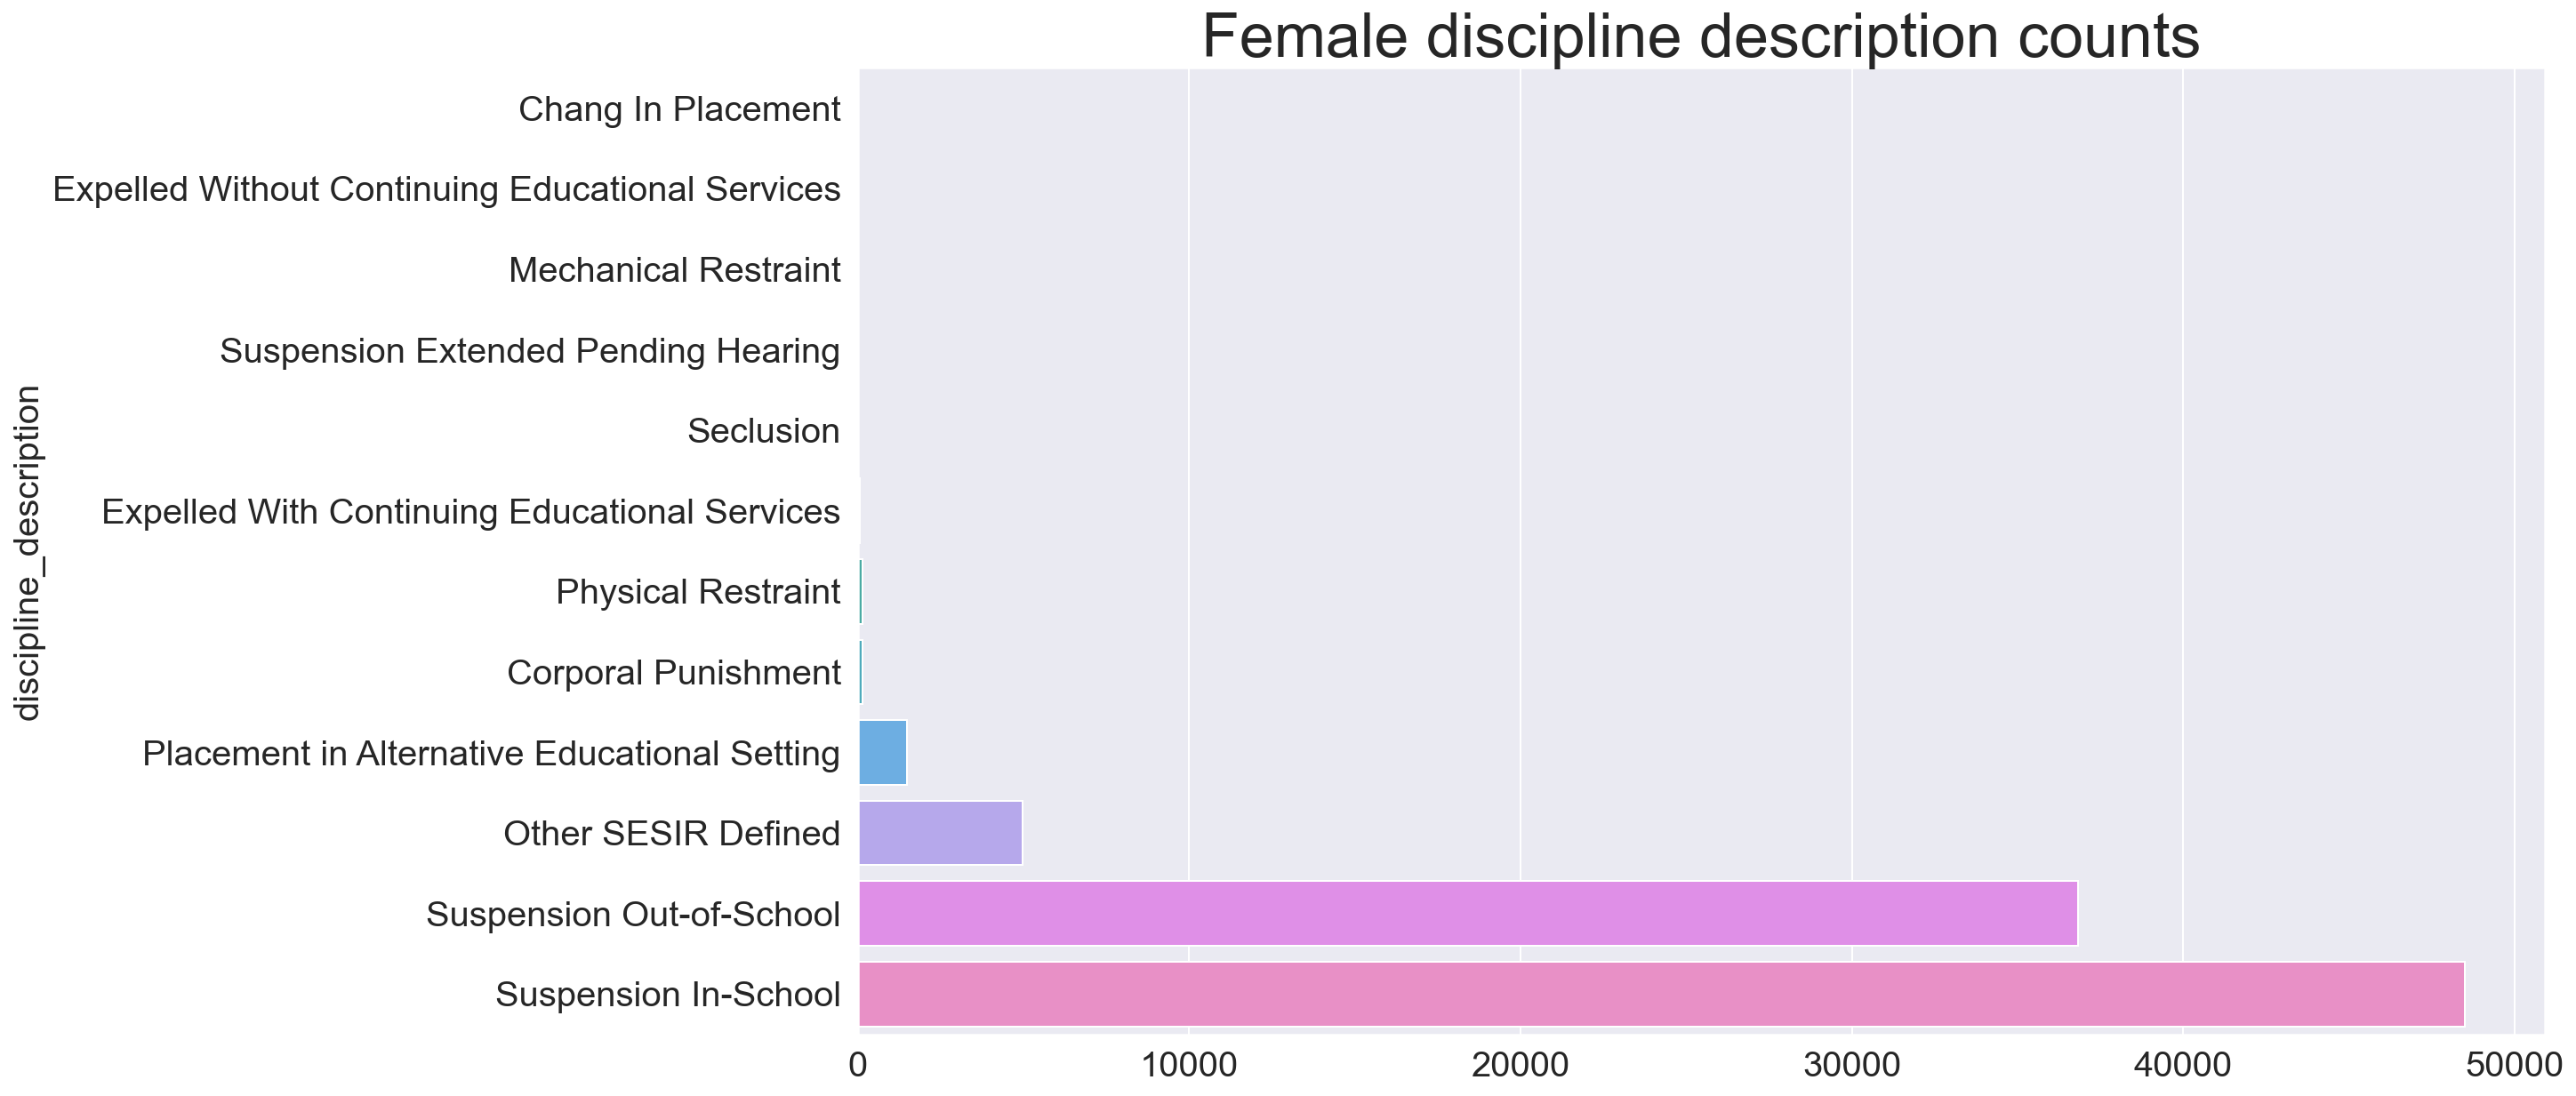

In [468]:
plt.figure(figsize=(17,10))
plt.rcParams.update({'font.size': 32})
ax = sns.barplot(x=np.round(discipline_desc.values), y=discipline_desc.index);

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):item.set_fontsize(20)
    
plt.title("Female discipline description counts", fontsize=35);

###  *Suspension In-School*  and  *Suspension Out-of-School*  are ~ 93% of all cases.

---